# Import Python Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings. filterwarnings ('ignore')

In [2]:
# Load dataset
df = pd.read_csv('Titanic.csv')

In [3]:
# Preview dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleansing

In [5]:
#Check missing value
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Fill missing value for Age
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

In [7]:
#Fill missing value for Embarked
val = df.Embarked.mode().values[0]
df['Embarked'] = df.Embarked.fillna(val)

In [8]:
#Drop Cabin
df.drop('Cabin', axis=1, inplace = True)

# Exploratory Data Analysis (EDA) 
involves several methods to delve into datasets and uncover valuable insights:

## 1. Identifying Data Relationships 
EDA helps identify relationships between different variables in the dataset. This can be done through visualizations such as scatter plots, correlation matrices, and heatmaps, which reveal how variables are related to each other.
## 2. Describing Data Drilling Concepts 
Data drilling involves examining data at different levels of granularity. Granularity refers to the level of detail or specificity in the data. EDA explores data at various granularities to understand patterns and trends. For example, drilling down from yearly data to monthly or daily data provides a more detailed perspective.
## 3. Describing Data Mining Concepts:
### Correlation Analysis 
EDA examines correlations between variables to identify patterns and relationships. Correlation matrices and scatter plots are commonly used to visualize correlations.

In [9]:
df_age_notnull = df['Age'][df['Age'].notnull()]

In [10]:
df_pclass_notnull = df['Pclass'][df['Pclass'].notnull()]

In [11]:
df_survived_notnull = df['Survived'][df['Survived'].notnull()]

In [12]:
df1 = df[['Age','Pclass','Survived']]

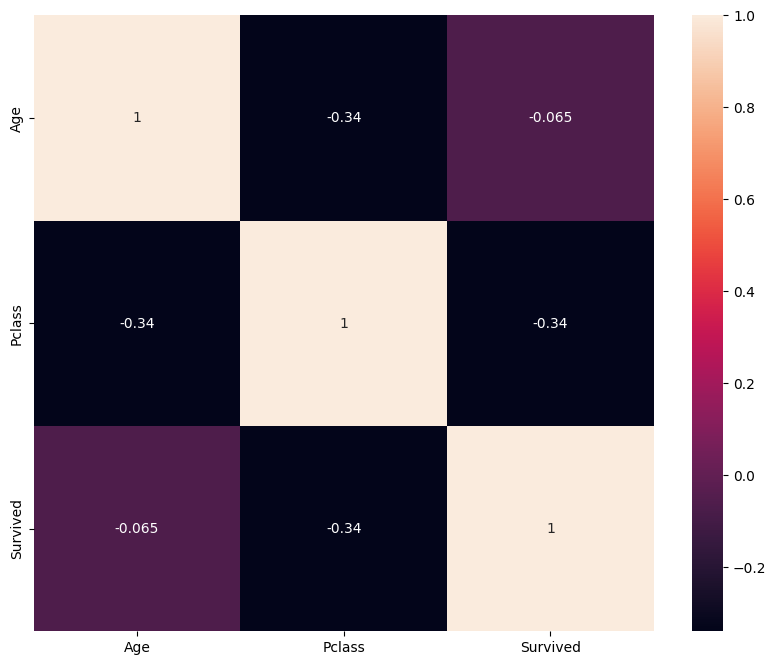

In [13]:
plt.figure(figsize = (10,8))
sns.heatmap(df1.corr(), annot=True);

### Anomalies 
- Anomalies are data or values that deviate from the expected pattern in a dataset.
- They may include nonsensical values, such as negative ages or fractional quantities, which are unrealistic in real-world scenarios, such as negative age (-15 years), which are implausible in real-world contexts.
- Anomalies can be detected through exploratory data analysis (EDA) techniques, such as visualizations like box plots and histograms.

### Outliers
- Outliers are data points that significantly differ from the majority of the dataset. Such as an age of 80 years is not inherently unreasonable in the context of human age, but its value is significantly distant from the general average, making it an outlier. 
- They represent notable deviations from the dataset's norm and may indicate interesting insights or data errors.
- Outliers are identified using EDA methods like box plots, scatter plots, and z-score analysis.

##### Anomaly is an outlier `HOWEVER` not all outliers are anomalies.

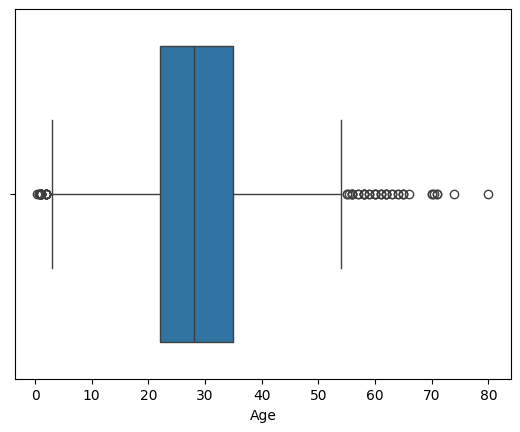

In [14]:
# Boxplot (H)
sns.boxplot(x=df['Age']);

#### Outliers
Outliers `don't always need to be discarded`; they can be reasonable but fall into the outlier category due to their limited quantity.

#### Anomalies
Anomalies `must be removed` as they deviate significantly from the expected pattern or are logically implausible.

## Handling
### Outliers
- Using IQR
- IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle.
- An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.
- we will use the same dataset

step 1:
- Arrange the data in increasing order
- Calculate first(q1) and third quartile(93)
- Find interquartile range (q3-91)
- Find lower bound q1*1.5
- Find upper bound q3*1.5
- Anything that lies outside of lower and upper bound is an outlier

In [15]:
df_age_notnull = df['Age'][df['Age'].notnull()]

finding first quantile and third quantile

In [16]:
q1, q3 = np.percentile(df_age_notnull, [25,75])
print(q1, q3)

22.0 35.0


Find the IQR which is the difference between third and first quartile

In [17]:
iqr = q3 - q1
print(iqr)

13.0


Find lower and upper bound

In [18]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(lower_bound)
print(upper_bound)

2.5
54.5


In [19]:
# Handling outlier (the lower and upper bounds are to be excluded, DEPENDING ON THE REQUIREMENTS)

df_age_new = df['Age'][(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]
print(df_age_new)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 825, dtype: float64


In [20]:
df_age_new.describe()

count    825.000000
mean      28.515152
std       10.177256
min        3.000000
25%       22.000000
50%       28.000000
75%       34.000000
max       54.000000
Name: Age, dtype: float64

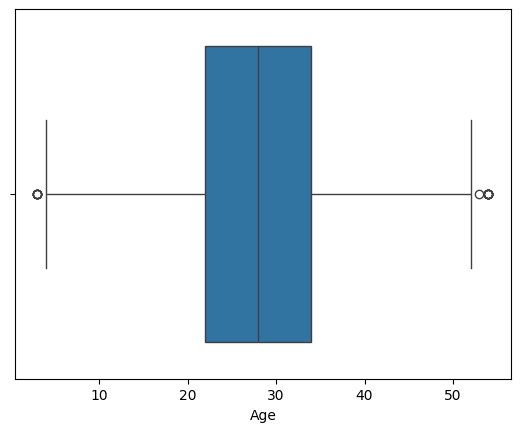

In [21]:
sns.boxplot(x=df_age_new);